# The libary

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as skp
import seaborn as sns
import tensorflow as tf
import time
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest , f_regression, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score, f1_score
from scipy import stats
from sklearn.metrics import roc_curve, auc,r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
train_data = pd.read_csv("train.csv")
train_value = train_data.iloc[:,:-2]
train_label = train_data.iloc[:,-2:]

In [ ]:
#Task1 Q1
print("The shape is ",train_data.shape)

The shape is  (3539, 33)


In [ ]:
#Task1 Q2
print("The data info is ",train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   C0                     3510 non-null   object 
 1   C1                     3539 non-null   object 
 2   C2                     3539 non-null   object 
 3   C3                     3539 non-null   object 
 4   C4                     3490 non-null   object 
 5   C5                     3431 non-null   object 
 6   C6                     3539 non-null   float64
 7   C7                     3539 non-null   object 
 8   C8                     3457 non-null   object 
 9   C9                     3397 non-null   object 
 10  C10                    3539 non-null   object 
 11  C11                    3381 non-null   object 
 12  C12                    3369 non-null   object 
 13  C13                    3419 non-null   object 
 14  C14                    3539 non-null   int64  
 15  C15 

Mean is  
 C6     66.324696
C14    23.204012
C16     0.683526
Name: mean, dtype: float64 
 Median is  
 C6     66.55
C14    20.00
C16     0.00
Name: 50%, dtype: float64 
 Range is  
 C6     47.5
C14    53.0
C16    20.0
dtype: float64 
 Variance is 
 C6     43.823775
C14    55.170351
C16     5.175678
Name: std, dtype: float64


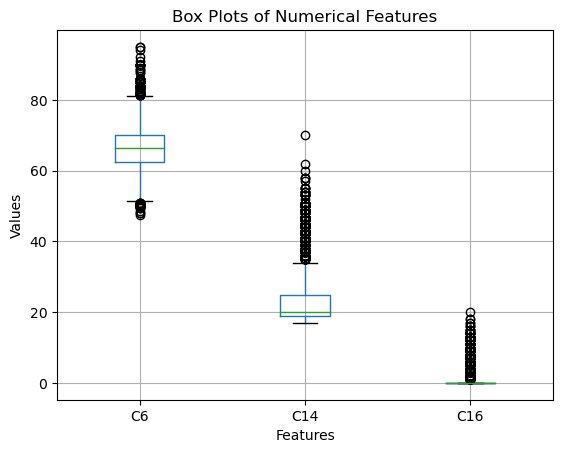

In [ ]:
#Task1 Q3
Index = train_data.select_dtypes(include=['float64','int64']).columns[:3]
Numercial = train_data[Index]
#print(Numercial)
Info_num = Numercial.describe()
mean = Info_num.loc['mean']
median = Info_num.loc['50%']
range_info = Info_num.loc['max']-Info_num.loc['min']
variance = Info_num.loc['std']**2
print('Mean is ','\n',mean,'\n','Median is ','\n',median,'\n','Range is ',
      '\n',range_info,'\n','Variance is','\n',variance)
#ploting graphe
train_data[Index].boxplot()
plt.title("Box Plots of Numerical Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()
plt.close()


single               3115
married               296
divorced               75
facto union            18
legally separated       3
widower                 3
Name: C0, dtype: int64
1st phase - general contingent                         1351
2nd phase - general contingent                          708
Over 23 years old                                       630
Change of course                                        253
Technological specialization diploma holders            160
Holders of other higher courses                         109
3rd phase - general contingent                          105
Transfer                                                 67
Change of institution/course                             45
Short cycle diploma holders                              30
1st phase - special contingent (Madeira Island)          29
International student (bachelor)                         26
1st phase - special contingent (Azores Island)           14
Ordinance No. 854-B/99                   

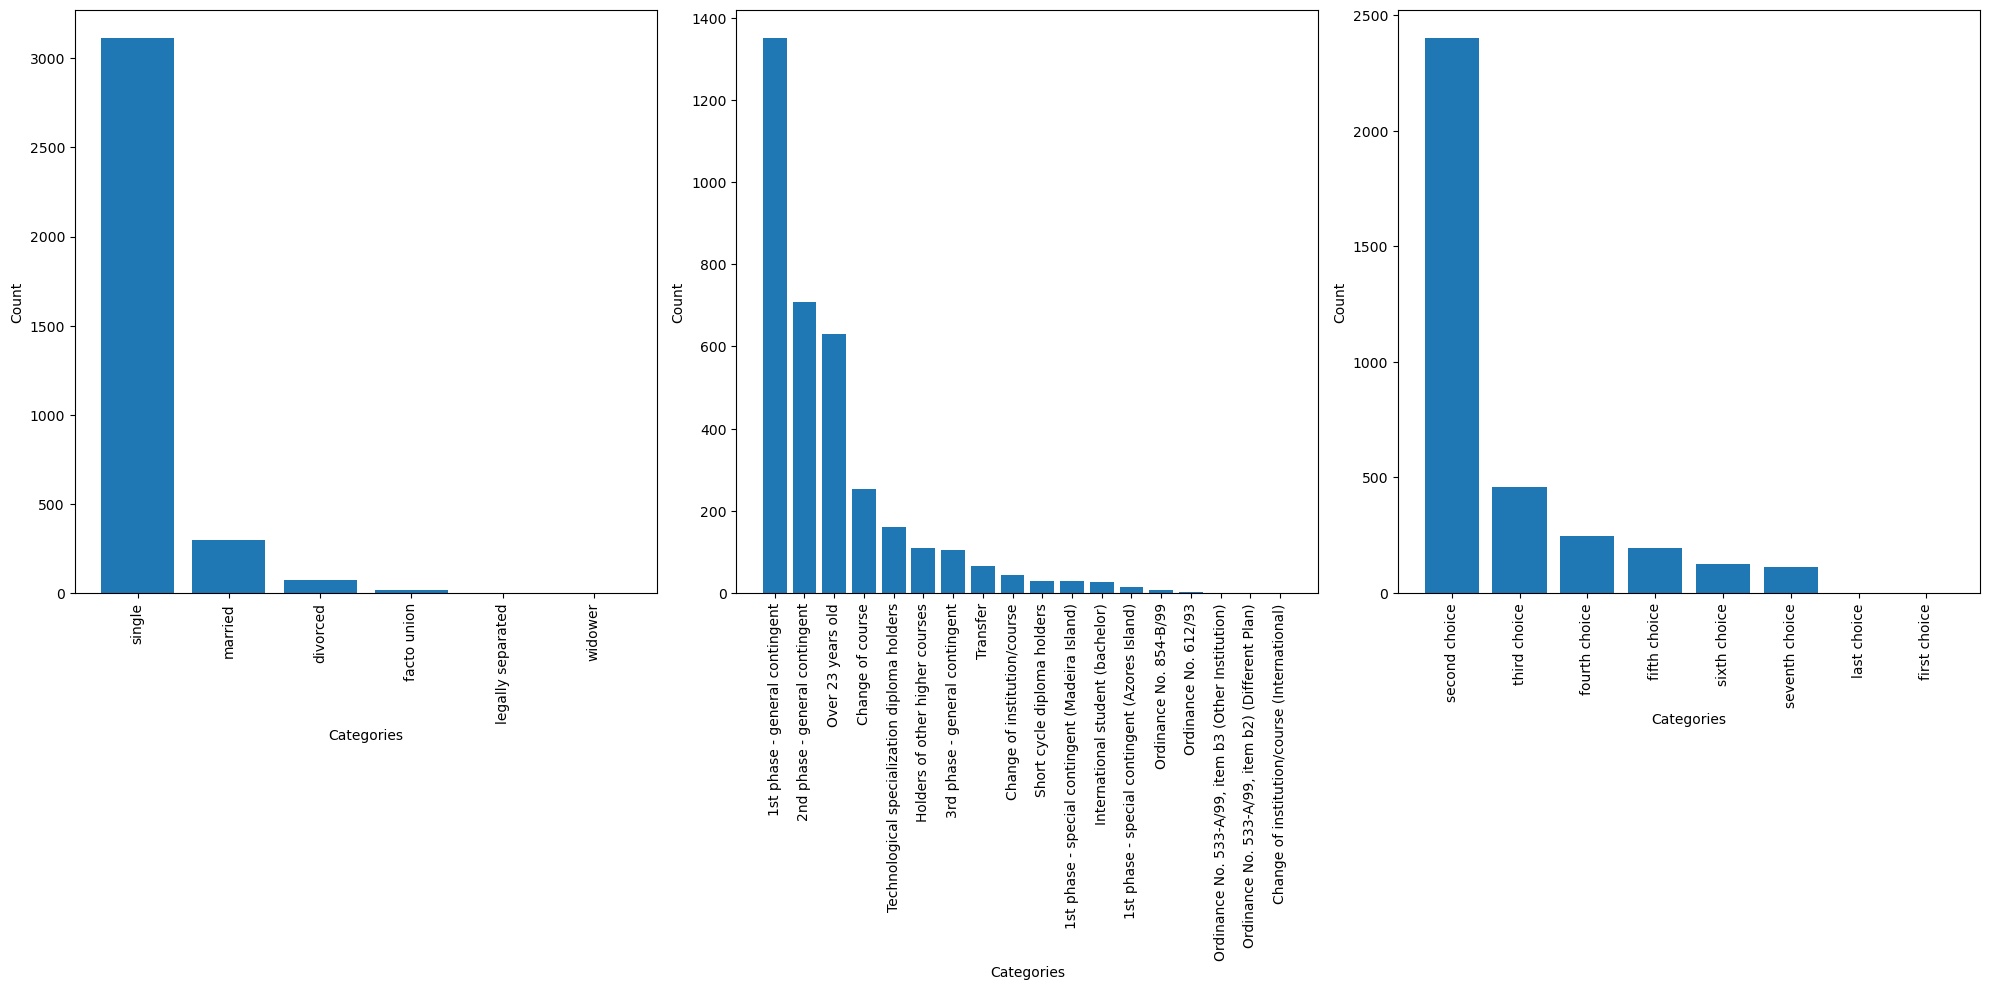

In [ ]:
#Task1 Q3
Categorical= train_data.select_dtypes(include=['object']).columns[:3]
#ploting graphe
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
for i, feature in enumerate(Categorical):
    counts = train_data[feature].value_counts()
    print(counts)
    axs[i].bar(counts.index, counts.values)
    axs[i].set_xlabel("Categories")
    axs[i].set_ylabel("Count")
    axs[i].tick_params(axis='x', rotation=90) #rotate
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
#Taks1 Q4
#method1 z-score
Numerical_filled = Numercial.fillna(0)
Z_score = stats.zscore(Numercial,axis=0)
z_array = np.array(Z_score)
First_outliers = Numercial[np.abs(z_array) > 3]
print(First_outliers)

#Task1 Q4
# creat Isolation Forest module
model = IsolationForest(n_estimators=100, contamination=0.05962136)
y_pred = model.fit_predict(Numercial)
outlier = y_pred == -1
Second_outliers = Numercial[outlier]
print(Second_outliers)


         C6  C14  C16
18    50.00   30   11
33    72.85   25    8
59    88.50   18    0
83    57.00   26    9
99    66.55   48    0
...     ...  ...  ...
3470  60.00   28   11
3487  90.00   24    0
3490  88.50   18    0
3500  72.50   24   11
3528  65.00   25    8

[211 rows x 3 columns]
         C6  C14  C16
12    80.00   28    2
18    50.00   30   11
33    72.85   25    8
83    57.00   26    9
86    55.00   33    5
...     ...  ...  ...
3393  60.00   37    7
3431  50.00   40    0
3448  60.50   45    8
3470  60.00   28   11
3500  72.50   24   11

[211 rows x 3 columns]


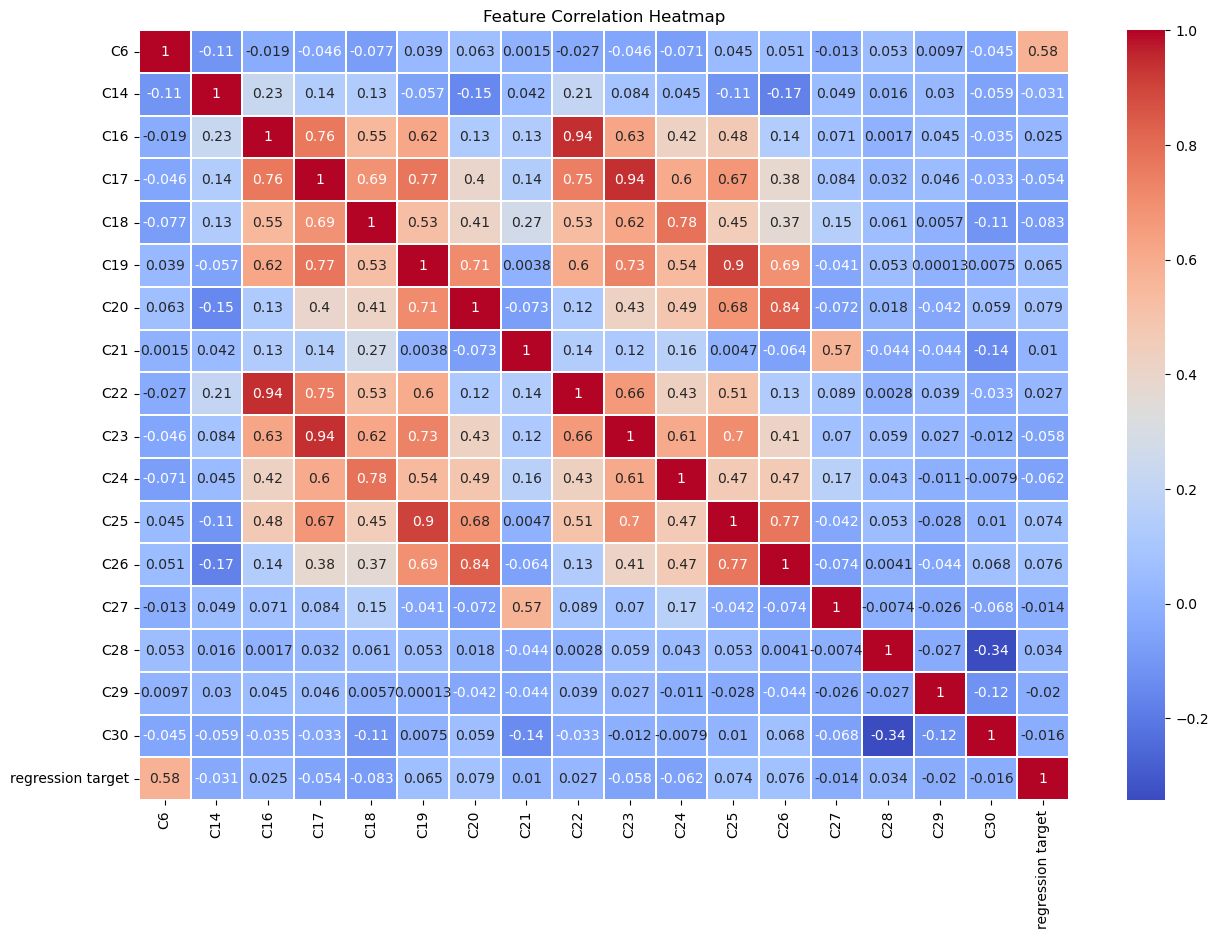

In [ ]:
#Task1 Q5
all_numerical = train_value.select_dtypes(include=['float64','int64'])
headmap_numerical = train_data.select_dtypes(include=['float64','int64'])
corr_matrix = headmap_numerical.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=0.3)
plt.title('Feature Correlation Heatmap')
plt.show()
plt.close()

In [ ]:
#Q7
# creater simpleImputer
all_categ = train_value.select_dtypes(include=['object'])
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_mode = SimpleImputer(strategy='most_frequent')
imputer_constant = SimpleImputer(strategy='constant',fill_value=0)
#numerical fill
fill_mean = imputer_mean.fit_transform(all_numerical)
fill_median = imputer_median.fit_transform(all_numerical)
fill_mode = imputer_mode.fit_transform(all_numerical)
fill_constant = imputer_constant.fit_transform(all_numerical)
#categoier
fill_mode_catego = imputer_mode.fit_transform(all_categ)
fill_constant_catego = imputer_constant.fit_transform(all_categ)
#to see if fill success
'''
data_filled = pd.DataFrame(fill_constant, columns=all_numerical.columns)
print(data_filled.isnull().sum())
'''

'\ndata_filled = pd.DataFrame(fill_constant, columns=all_numerical.columns)\nprint(data_filled.isnull().sum())\n'

In [ ]:
#Q8

#StandardScaler
stand = skp.StandardScaler()
#print(fill_mean.transpose().shape) #(18,3539)
stand_data = stand.fit_transform(fill_mean)
print('This the first ten before StandardScaler','\n',fill_mean.transpose()[0,:10])
print('This the first ten after StandardScaler','\n',stand_data.transpose()[0,:10])
print('\n')

#MinMaxScaler
Minmax = skp.MinMaxScaler()
minmax_data = Minmax.fit_transform(fill_mean)
print('This the first ten before MinmaxScaler','\n',fill_mean.transpose()[0,:10])
print('This the first ten after MinmaxScaler','\n',minmax_data.transpose()[0,:10])
print('\n')

#RoustScaler
Robust = skp.RobustScaler()
robust_data = Robust.fit_transform(fill_mean)
print('This the first ten before RobustScaler','\n',fill_mean.transpose()[0,:10])
print('This the first ten after RobustScaler','\n',robust_data.transpose()[0,:10])
print('\n')

This the first ten before StandardScaler 
 [65.   65.   59.5  66.55 71.   70.   57.5  65.5  70.   80.  ]
This the first ten after StandardScaler 
 [-0.20013488 -0.20013488 -1.03107392  0.03403885  0.70634407  0.55526425
 -1.33323357 -0.12459496  0.55526425  2.0660625 ]


This the first ten before MinmaxScaler 
 [65.   65.   59.5  66.55 71.   70.   57.5  65.5  70.   80.  ]
This the first ten after MinmaxScaler 
 [0.36842105 0.36842105 0.25263158 0.40105263 0.49473684 0.47368421
 0.21052632 0.37894737 0.47368421 0.68421053]


This the first ten before RobustScaler 
 [65.   65.   59.5  66.55 71.   70.   57.5  65.5  70.   80.  ]
This the first ten after RobustScaler 
 [-0.20666667 -0.20666667 -0.94        0.          0.59333333  0.46
 -1.20666667 -0.14        0.46        1.79333333]




In [ ]:
#Q9 Encoding Caategorical Variables
#OneHotEncoder
OneHot = skp.OneHotEncoder(sparse_output=False,dtype=np.int8,drop='first',handle_unknown='error')
OneHot_data = OneHot.fit_transform(fill_mode_catego)
OneHot_label = OneHot.fit_transform(np.array(train_label)[:,-1].reshape(-1,1)) # cate label
print('This the first ten before OneHotEncoder','\n',fill_mode_catego.transpose()[0,:30])  #Remove to print
print('This the first ten after OneHotEncoder','\n',OneHot_label.transpose()[0,:10])

#OrdinalEncoder
Ordinal = skp.OrdinalEncoder()
Ordinal_data = Ordinal.fit_transform(fill_mode_catego)  #value
ordinal_label = Ordinal.fit_transform(np.array(train_label)[:,-1].reshape(-1,1))  #label
print('This the first ten before Ordinal','\n',fill_mode_catego.transpose()[0][:10])        #Remove to print
print('This the first ten before after','\n',Ordinal_data.transpose()[0][:10])


This the first ten before OneHotEncoder 
 ['divorced' 'single' 'single' 'married' 'single' 'single' 'single'
 'single' 'single' 'single' 'single' 'single' 'single' 'single' 'single'
 'single' 'single' 'married' 'divorced' 'single' 'single' 'single'
 'single' 'single' 'single' 'single' 'single' 'single' 'single' 'single']
This the first ten after OneHotEncoder 
 [0 1 1 0 1 1 1 1 0 0]
This the first ten before Ordinal 
 ['divorced' 'single' 'single' 'married' 'single' 'single' 'single'
 'single' 'single' 'single']
This the first ten before after 
 [0. 4. 4. 3. 4. 4. 4. 4. 4. 4.]


In [ ]:
#Q10 Feature Selection
#VarianceThreshold
Variance_model = VarianceThreshold(threshold=0.2)
variance_data_num = Variance_model.fit_transform(stand_data) # no select
print(Variance_model.get_support())
variance_data_cate = Variance_model.fit_transform(Ordinal_data) #[ 0  1  2  3  5  6  7 11 14] col that keep

print(Variance_model.get_support())
print()

# separte the numerical label
numerical_label = np.array(train_label)[:,0]
numerical_label = numerical_label.astype(float)

#SelectKbest
k=5
Select_catego = SelectKBest(score_func=chi2,k = k)
Select_numical = SelectKBest(score_func=f_regression,k=k)
X_cat , Y_cat = Ordinal_data ,ordinal_label
X_num , Y_num = stand_data,  numerical_label
select_data_num = Select_numical.fit_transform(X_num,Y_num)
select_data_cat = Select_catego.fit_transform(X_cat,Y_cat)
selcted_index_num = Select_numical.get_support(indices=True)
selcted_index_cat = Select_catego.get_support(indices=True)
print(all_numerical.info(),all_categ.info())
print(selcted_index_num,selcted_index_cat)



[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[ True  True  True  True False  True  True  True False False False  True
 False False]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C6      3539 non-null   float64
 1   C14     3539 non-null   int64  
 2   C16     3539 non-null   int64  
 3   C17     3391 non-null   float64
 4   C18     3539 non-null   int64  
 5   C19     3539 non-null   int64  
 6   C20     3368 non-null   float64
 7   C21     3539 non-null   int64  
 8   C22     3523 non-null   float64
 9   C23     3511 non-null   float64
 10  C24     3539 non-null   int64  
 11  C25     3395 non-null   float64
 12  C26     3539 non-null   float64
 13  C27     3539 non-null   int64  
 14  C28     3539 non-null   float64
 15  C29     3379 non-null   float64
 16  C30     3539 non-null   float

Part 3

In [ ]:
#Part3 Regression Prepare the data
#Q12
combine_data = np.hstack((stand_data,Ordinal_data))
combine_label = np.hstack((numerical_label.reshape(-1,1),ordinal_label))
x_train, x_test, y_train, y_test = train_test_split(combine_data, combine_label, test_size=0.2, random_state=4211)
selected_feature = np.array([0,1,4,10,12,14]) #select


Score =np.empty(shape=(1,))
for i in selected_feature:
    X_train_single = x_train[:,i].reshape(-1, 1)
    X_test_single = x_test[:,i].reshape(-1, 1)
    linear_model = LinearRegression()
    if i <= 16:
        linear_model.fit(X_train_single, y_train[:,0])
        score = linear_model.score(X_test_single,y_test[:,0])
    else:
        linear_model.fit(X_train_single, y_train[:,1])
        score = linear_model.score(X_test_single,y_test[:,1])
    y_pred = linear_model.predict(x_test[:, i].reshape(-1, 1))
    mse = mean_squared_error(y_test[:, 0], y_pred)

    print('Feature select is ',i, ' Score is ',score)
    print("Model i is:",i,' MSE is ',  mse)
    np.append(Score,score)
'''
#model1
linear_model1 = LinearRegression()
linear_model1.fit(x_train[:,0].reshape(-1, 1), y_train[:,0])
score1 = linear_model1.score(x_test[:, 0].reshape(-1, 1), y_test[:, 0])
print("Model 1 R2 Score:", score1)
y_pred1 = linear_model1.predict(x_test[:, 0].reshape(-1, 1))
mse1 = mean_squared_error(y_test[:, 0], y_pred1)
print("Model 1 MSE:", mse1)
#model2
linear_model2 = LinearRegression()
linear_model2.fit(x_train[:,4].reshape(-1, 1), y_train[:,0])
score2 = linear_model2.score(x_test[:, 4].reshape(-1, 1), y_test[:, 0])
print("Model 2 R2 Score:", score2)
y_pred2 = linear_model2.predict(x_test[:, 4].reshape(-1, 1))
mse2 = mean_squared_error(y_test[:, 0], y_pred2)
print("Model 2 MSE:", mse2)
#model3
linear_model3 = LinearRegression()
linear_model3.fit(x_train[:,5].reshape(-1, 1), y_train[:,0])
score3 = linear_model3.score(x_test[:, 5].reshape(-1, 1), y_test[:, 0])
print("Model 3 R2 Score:", score3)
y_pred3 = linear_model3.predict(x_test[:, 5].reshape(-1, 1))
mse3 = mean_squared_error(y_test[:, 0], y_pred3)
print("Model 3 MSE:", mse3)
#model4
linear_model4 = LinearRegression()
linear_model4.fit(x_train[:,6].reshape(-1, 1), y_train[:,0])
score4 = linear_model4.score(x_test[:, 6].reshape(-1, 1), y_test[:, 0])
print("Model 4 R2 Score:", score4)
y_pred4 = linear_model4.predict(x_test[:, 6].reshape(-1, 1))
mse4 = mean_squared_error(y_test[:, 0], y_pred4)
print("Model 4 MSE:", mse4)
#model5
linear_model5 = LinearRegression()
linear_model5.fit(x_train[:,11].reshape(-1, 1), y_train[:,0])
score5 = linear_model5.score(x_test[:, 11].reshape(-1, 1), y_test[:, 0])
print("Model 5 R2 Score:", score5)
y_pred5 = linear_model5.predict(x_test[:, 11].reshape(-1, 1))
mse5 = mean_squared_error(y_test[:, 0], y_pred5)
print("Model 5 MSE:", mse5)
#model6
linear_model6 = LinearRegression()
linear_model6.fit(x_train[:,12].reshape(-1, 1), y_train[:,0])
score6 = linear_model6.score(x_test[:, 12].reshape(-1, 1), y_test[:, 0])
print("Model 6 R2 Score:", score6)
y_pred6 = linear_model6.predict(x_test[:, 12].reshape(-1, 1))
mse6 = mean_squared_error(y_test[:, 0], y_pred6)
print("Model 6 MSE:", mse6)
'''




Feature select is  0  Score is  0.3457983455467899
Model i is: 0  MSE is  0.0031823076103367383
Feature select is  1  Score is  -0.0009205773022631369
Model i is: 1  MSE is  0.004868891952212952
Feature select is  4  Score is  0.01785195834079767
Model i is: 4  MSE is  0.004777574569207919
Feature select is  10  Score is  0.010488645157375132
Model i is: 10  MSE is  0.004813392772083733
Feature select is  12  Score is  -0.007736001857362451
Model i is: 12  MSE is  0.0049020449980387015
Feature select is  14  Score is  0.0025504461422434233
Model i is: 14  MSE is  0.004852007457580571


'\n#model1\nlinear_model1 = LinearRegression()\nlinear_model1.fit(x_train[:,0].reshape(-1, 1), y_train[:,0])\nscore1 = linear_model1.score(x_test[:, 0].reshape(-1, 1), y_test[:, 0])\nprint("Model 1 R2 Score:", score1)\ny_pred1 = linear_model1.predict(x_test[:, 0].reshape(-1, 1))\nmse1 = mean_squared_error(y_test[:, 0], y_pred1)\nprint("Model 1 MSE:", mse1)\n#model2\nlinear_model2 = LinearRegression()\nlinear_model2.fit(x_train[:,4].reshape(-1, 1), y_train[:,0])\nscore2 = linear_model2.score(x_test[:, 4].reshape(-1, 1), y_test[:, 0])\nprint("Model 2 R2 Score:", score2)  \ny_pred2 = linear_model2.predict(x_test[:, 4].reshape(-1, 1))\nmse2 = mean_squared_error(y_test[:, 0], y_pred2)\nprint("Model 2 MSE:", mse2)\n#model3\nlinear_model3 = LinearRegression()\nlinear_model3.fit(x_train[:,5].reshape(-1, 1), y_train[:,0])\nscore3 = linear_model3.score(x_test[:, 5].reshape(-1, 1), y_test[:, 0])\nprint("Model 3 R2 Score:", score3)\ny_pred3 = linear_model3.predict(x_test[:, 5].reshape(-1, 1))\nmse

In [ ]:
#Step2 Combination
com_data= np.zeros(shape=combine_data[:,0].shape)
com_label = np.zeros(shape=combine_label[:,0].shape)
#combine_label[:,0].reshape(-1,1)
for a in selected_feature:
    com_data += combine_data[:,a]
    if a <=16:
        com_label += combine_label[:,0]
    else:
        com_label += combine_label[:,1]

x_com_train, x_com_test, y_com_train, y_com_test = train_test_split(com_data, com_label, test_size=0.2, random_state=4211)
com_linear_model = LinearRegression()
com_linear_model.fit(x_com_train.reshape(-1, 1), y_com_train.reshape(-1, 1))
com_score = com_linear_model.score(x_com_test.reshape(-1, 1),y_com_test.reshape(-1, 1))
print("Combined Model R2 Score:", com_score)
y_pred_combined = com_linear_model.predict(x_com_test.reshape(-1, 1))
mse_combined = mean_squared_error(y_com_test.reshape(-1, 1), y_pred_combined)
print("Combined Model MSE:", mse_combined)


Combined Model R2 Score: 0.009222254707064947
Combined Model MSE: 0.17350390869738402


In [ ]:
#Q14 catego select c0 married single or ...
linear_model_cate = LinearRegression()
#18th are the first categorical in data
linear_model_cate.fit(x_train[:,18].reshape(-1, 1), y_train[:,1])
scorecate = linear_model_cate.score(x_test[:, 18].reshape(-1, 1), y_test[:, 1])
print("Model cate R2 Score:", scorecate)
y_predcate= linear_model_cate.predict(x_test[:, 18].reshape(-1, 1))
msecate = mean_squared_error(y_test[:, 1], y_predcate)
print("Model cate MSE:", msecate)

Model cate R2 Score: 0.07803319159555833
Model cate MSE: 0.19495489773219063





23/23 [==============================] - 0s 734us/step
Hidden Units:  1
Training Time (Mean):  5.506744623184204 seconds
Training Time (std):  1.159488861714648 seconds
R2 Score (Mean):  -0.00015597153370583428
R2 Score (std  9.87124497370063e-05

Hidden Units:  8
Training Time (Mean):  6.214767853418986 seconds
Training Time (std):  1.8049426751474262 seconds
R2 Score (Mean):  0.3999402021184937
R2 Score (std  0.007580721489063291

Hidden Units:  32
Training Time (Mean):  3.5854711532592773 seconds
Training Time (std):  0.2589206602070694 seconds
R2 Score (Mean):  0.32605010482276625
R2 Score (std  0.010235696715792596

Hidden Units:  128
Training Time (Mean):  2.59047269821167 seconds
Training Time (std):  0.321021678413475 seconds
R2 Score (Mean):  0.33702265472234383
R2 Score (std  0.00628464118484966



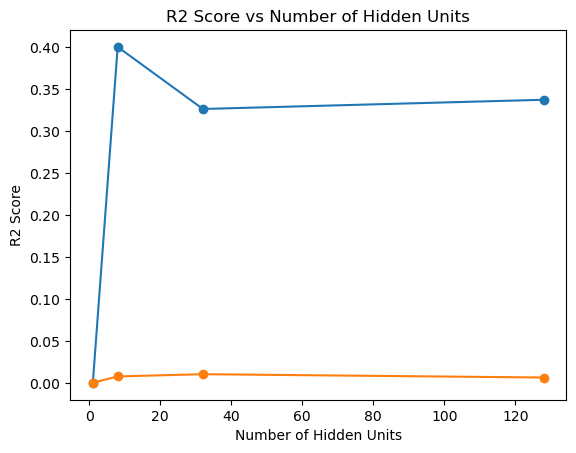

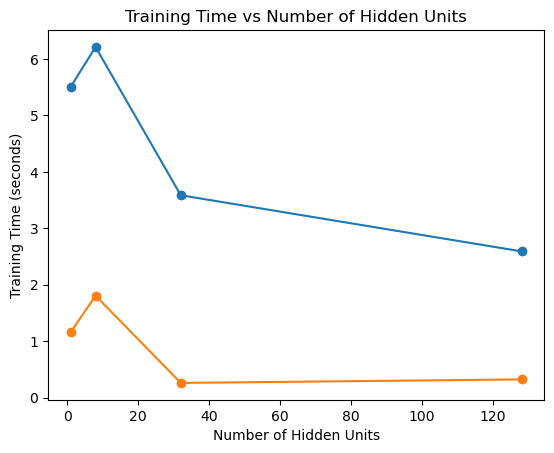

In [ ]:
#Q6.2  Feed nerual network
#Def a traning function model
def Neural_network(no_unit):
    nural_model = tf.keras.models.Sequential()
    nural_model.add(tf.keras.layers.Dense(units=no_unit,activation='relu'))
    nural_model.add(tf.keras.layers.Dense(units=no_unit,activation='relu'))
    nural_model.add(tf.keras.layers.Dense(units=no_unit,activation='relu'))
    nural_model.add(tf.keras.layers.Dense(units=1, activation='linear'))
    return nural_model
#peapre the data
prepare_data = combine_data[:, selected_feature]
prepare_label = numerical_label
pre_train_x, pre_test_x, pre_train_y, pre_test_y = train_test_split(prepare_data, prepare_label, test_size=0.2, random_state=4211)

#hidden units list
unit_list = [1,8,32,128]
R2_score_final = []
train_times_final = []
Repeat_time =3

#Remove the comment to activate the nerual network training

def Traning_Neural_network(Repeat_time,hidden_unit,R2_score_final,train_times_final):
    R2_score = []
    train_times = []
    for i in range(Repeat_time):
        model = Neural_network(hidden_unit)
        model.compile(optimizer='adam',loss='mse')
        early_stopping = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

        strat_time = time.time()
        fit_record = model.fit(pre_train_x, pre_train_y, validation_data=(pre_test_x, pre_test_y), epochs=100, callbacks=[early_stopping], verbose=0)
        end_time =time.time()

        prediction = model.predict(pre_test_x)
        r2 =  r2_score(pre_test_y, prediction)
        train_time = end_time-strat_time
        R2_score.append(r2)
        train_times.append(train_time)

    train_time_mean = np.mean(train_times)
    R2_score_mean = np.mean(R2_score)
    train_time_std = np.std(train_times)
    R2_score_std = np.std(R2_score)

    R2_score_final.append((R2_score_mean,R2_score_std))
    train_times_final.append((train_time_mean,train_time_std))
    return train_times_final, R2_score_final

for i in unit_list:
    Traning_Neural_network(Repeat_time,i,R2_score_final,train_times_final)

for i, hidden_unit in enumerate(unit_list):
    print('Hidden Units: ',hidden_unit)
    print('Training Time (Mean): ',train_times_final[i][0],'seconds')
    print('Training Time (std): ',train_times_final[i][1] ,'seconds')
    print('R2 Score (Mean): ',R2_score_final[i][0])
    print('R2 Score (std ',R2_score_final[i][1])
    print()


#Plot the R2 scores vs time
plt.plot(unit_list, R2_score_final, marker='o')
plt.xlabel('Number of Hidden Units')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Number of Hidden Units')
plt.show()
plt.close()

plt.plot(unit_list, train_times_final, marker='o')
plt.xlabel('Number of Hidden Units')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Number of Hidden Units')
plt.show()
plt.close()



Part 4

In [ ]:
#Part4 Classification

#Data prepare
classification_data = Ordinal_data[:,selcted_index_cat]
classification_label = np.ravel(ordinal_label)
#initial variable
learning_ratr = [10,1,0.1]
repeat_count = 3
cate_train_x, cate_test_x,cate_train_y, cate_test_y = train_test_split(classification_data, classification_label, test_size=0.2, random_state=4211)
results={}

def classmodel(learning_rate,repeat_count,results):
    temp_score = []
    temp_accuracy = []
    temp_time = []
    for i in range(repeat_count):
        logistic_model = LogisticRegression(max_iter=100,solver='sag',C=1/learning_rate)

        logisitc_strat_time = time.time()
        logistic_model.fit(cate_train_x, cate_train_y)
        logisitc_end_time = time.time()
        temp_time.append(logisitc_end_time-logisitc_strat_time)

        logistic_pred = logistic_model.predict(cate_test_x)
        accuracy = accuracy_score(cate_test_y,logistic_pred)
        F1_score = f1_score(cate_test_y,logistic_pred,average='binary')

        temp_score.append(F1_score)
        temp_accuracy.append(accuracy)

    results[learning_rate] = {
        'Training Time': np.mean(temp_time),
        'Training Time Std': np.std(temp_time),
        'Accuracy': np.mean(temp_accuracy),
        'Accuracy Std': np.std(temp_accuracy),
        'F1 Score': np.mean(temp_score),
        'F1 Score Std': np.std(temp_score)
    }
    return results

classmodel(10,3,results)

# print all the need infomation
for rate, result in results.items():
    print("Learning Rate (η):", rate)
    print("Training Time:", result['Training Time'], "seconds (Std:", result['Training Time Std'], "seconds)")
    print("Accuracy:", result['Accuracy'], "(Std:", result['Accuracy Std'], ")")
    print("F1 Score:", result['F1 Score'], "(Std:", result['F1 Score Std'], ")")
    print()




Learning Rate (η): 10
Training Time: 0.006000836690266927 seconds (Std: 2.1442949872385724e-06 seconds)
Accuracy: 0.7231638418079096 (Std: 0.0 )
F1 Score: 0.8240574506283661 (Std: 1.1102230246251565e-16 )



The learning rate is  10 .  The Auc value is  0.7519128260767016


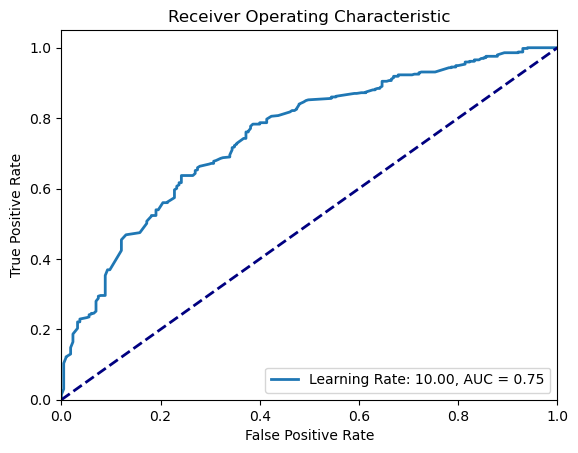

In [ ]:
#plot the graph and AUC value
plt.figure()

logistic_model = LogisticRegression(max_iter=100, solver='sag', C=1/10)
logistic_model.fit(cate_train_x, cate_train_y)

logistic_pred_prob = logistic_model.predict_proba(cate_test_x)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(cate_test_y, logistic_pred_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('The learning rate is ',10,'. ','The Auc value is ',roc_auc)
plt.plot(false_positive_rate, true_positive_rate, lw=2, label='Learning Rate: %0.2f, AUC = %0.2f' % (10, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()
plt.close()

Learning Rate (η): 10
Training Time: 0.006000041961669922 seconds (Std: 0.0008166321394313058 seconds)
Accuracy: 0.7231638418079096 (Std: 0.0 )
F1 Score: 0.8240574506283661 (Std: 1.1102230246251565e-16 )

Learning Rate (η): 1
Training Time: 0.005666891733805339 seconds (Std: 0.0009424597335277633 seconds)
Accuracy: 0.731638418079096 (Std: 0.0 )
F1 Score: 0.8285198555956678 (Std: 0.0 )

Learning Rate (η): 0.1
Training Time: 0.0053331851959228516 seconds (Std: 0.0004715389511856095 seconds)
Accuracy: 0.731638418079096 (Std: 0.0 )
F1 Score: 0.8285198555956678 (Std: 0.0 )

The learning rate is  10 .  The Auc value is  0.751922260483985
The learning rate is  1 .  The Auc value is  0.751790178782018
The learning rate is  0.1 .  The Auc value is  0.7517524411528845


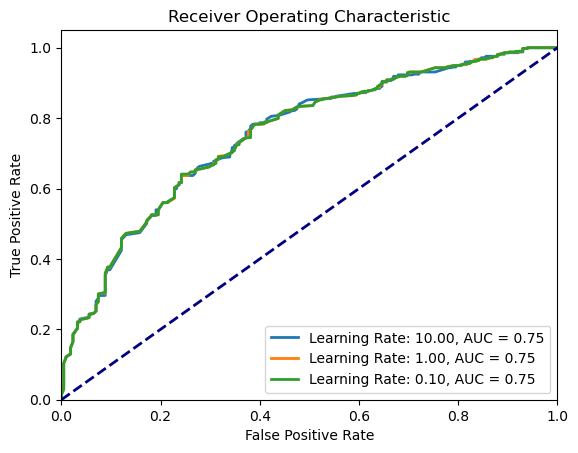

In [ ]:
results.clear()
#Try different learning rate
for i in learning_ratr:
    classmodel(i,3,results)

# print all the need infomation
for rate, result in results.items():
    print("Learning Rate (η):", rate)
    print("Training Time:", result['Training Time'], "seconds (Std:", result['Training Time Std'], "seconds)")
    print("Accuracy:", result['Accuracy'], "(Std:", result['Accuracy Std'], ")")
    print("F1 Score:", result['F1 Score'], "(Std:", result['F1 Score Std'], ")")
    print()
#plot the graph and AUC value
plt.figure()

for i in learning_ratr:
    logistic_model = LogisticRegression(max_iter=100, solver='sag', C=1/i)
    logistic_model.fit(cate_train_x, cate_train_y)

    logistic_pred_prob = logistic_model.predict_proba(cate_test_x)[:, 1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(cate_test_y, logistic_pred_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('The learning rate is ',i,'. ','The Auc value is ',roc_auc)
    plt.plot(false_positive_rate, true_positive_rate, lw=2, label='Learning Rate: %0.2f, AUC = %0.2f' % (i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()
plt.close()

Hidden unit:  1
Mean Training Time: 0.04666852951049805
Std Training Time: 0.0017012332721621727
Mean Accuracy: 0.4345574387947269
Std Accuracy: 0.18509951522585705
Mean F1 Score: 0.2736608381903969
Std F1 Score: 0.3870148688592483

Hidden unit:  8
Mean Training Time: 0.0946648120880127
Std Training Time: 0.0155216315680868
Mean Accuracy: 0.7062146892655368
Std Accuracy: 0.0011532437583725065
Mean F1 Score: 0.8210786277127067
Std F1 Score: 0.0019026071773419152

Hidden unit:  32
Mean Training Time: 0.21515615781148276
Std Training Time: 0.018054165181232183
Mean Accuracy: 0.7278719397363465
Std Accuracy: 0.002902266479740579
Mean F1 Score: 0.8261167802395953
Std F1 Score: 0.0013985093539090772

Hidden unit:  128
Mean Training Time: 0.5868920485178629
Std Training Time: 0.03627546126469139
Mean Accuracy: 0.7321092278719398
Std Accuracy: 0.0048013366418011155
Mean F1 Score: 0.8209591710774075
Std F1 Score: 0.004938094218214632



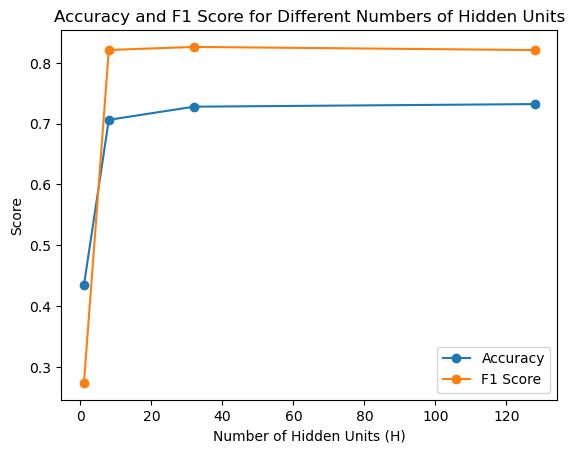

In [ ]:
# Classification by neural network

#Defind Three layers neural network
class_hidden_units_list = [1, 8, 32, 128]
num_runs = 3

training_times = []
neural_accuray = []
neural_f1_scores = []

#creat model
def class_neural (hidden_unit,num_runs,training_times,neural_accuray,neural_f1_scores,cate_train_x, cate_test_x,cate_train_y, cate_test_y):
    temp_time = []
    temp_accuary = []
    temp_f1score = []
    for i in range(num_runs):

        mlp_model = MLPClassifier(hidden_layer_sizes=(hidden_unit, hidden_unit, hidden_unit), early_stopping=True)

        start_time = time.time()
        mlp_model.fit(cate_train_x,cate_train_y)
        end_time = time.time()
        temp_time.append(end_time-start_time)

        mlp_pred = mlp_model.predict(cate_test_x)
        accuray = accuracy_score(cate_test_y,mlp_pred)
        f1 = f1_score(cate_test_y,mlp_pred)

        temp_accuary.append(accuray)
        temp_f1score.append(f1)
    training_times.append((np.mean(temp_time),np.std(temp_time)))
    neural_accuray.append((np.mean(temp_accuary),np.std(temp_accuary)))
    neural_f1_scores.append((np.mean(temp_f1score),np.std(temp_f1score)))

    return training_times , neural_accuray, neural_f1_scores

# Fill it with different hidden units
for i in class_hidden_units_list:
    class_neural (i,num_runs,training_times,neural_accuray,neural_f1_scores,cate_train_x, cate_test_x,cate_train_y, cate_test_y)

for i in range(len(class_hidden_units_list)):
    print('Hidden unit: ',class_hidden_units_list[i])
    print("Mean Training Time:", training_times[i][0])
    print("Std Training Time:", training_times[i][1])
    print("Mean Accuracy:", neural_accuray[i][0])
    print("Std Accuracy:", neural_accuray[i][1])
    print("Mean F1 Score:", neural_f1_scores[i][0])
    print("Std F1 Score:", neural_f1_scores[i][1])
    print()



#Plot the figures
yaxis_acc = [acc[0] for acc in neural_accuray]
yaxis_f1 = [f1[0] for f1 in neural_f1_scores]
plt.plot(class_hidden_units_list, yaxis_acc, marker='o', label='Accuracy')
plt.plot(class_hidden_units_list, yaxis_f1, marker='o', label='F1 Score')
plt.xlabel('Number of Hidden Units (H)')
plt.ylabel('Score')
plt.title('Accuracy and F1 Score for Different Numbers of Hidden Units')
plt.legend()
plt.show()
plt.close()

Part 5

In [ ]:
#Performent Enhancement
classification_targe = train_data["classification target"]
def pipe_mlp(x,y,repeat_time,hidden_unit):
    pipe_train_x, pipe_test_x,pipe_train_y, pipe_test_y = train_test_split(x, y, test_size=0.2, random_state=4211)
    temp_time = []
    temp_accuary = []
    temp_f1score = []
    for i in range(repeat_time):

        mlp_model = MLPClassifier(hidden_layer_sizes=(hidden_unit, hidden_unit, hidden_unit), early_stopping=True,learning_rate='invscaling',alpha=1e-4)

        start_time = time.time()
        mlp_model.fit(pipe_train_x,pipe_train_y)
        end_time = time.time()
        temp_time.append(end_time-start_time)
        #print('Training Time: ',end_time-start_time )

        mlp_pred = mlp_model.predict(pipe_test_x)
        accuray = mlp_model.score(pipe_test_x,pipe_test_y)
        #print("Accuracy: ", accuray)
        f1 = f1_score(pipe_test_y,mlp_pred,pos_label='success',average='binary')
        #print("F1 Score: ", f1)
        temp_accuary.append(accuray)
        temp_f1score.append(f1)

    print("Mean Training Time:", np.mean(temp_time))
    print("Std Training Time:", np.std(temp_time))
    print("Mean Accuracy:", np.mean(temp_accuary))
    print("Std Accuracy:", np.std(temp_accuary))
    print("Mean F1 Score:", np.mean(temp_f1score))
    print("Std F1 Score:", np.std(temp_f1score))
    print()



In [ ]:
#CombinationA
train_data = pd.read_csv("train.csv")

COM_A_numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),('scaler', skp.StandardScaler())
])

COM_A_categorical_transformer = Pipeline(steps=[
    ('encoder', skp.OneHotEncoder(sparse_output=False,dtype=np.int8,handle_unknown='error'))
])

processor_A = ColumnTransformer(transformers=[
    ('num', COM_A_numerical_transformer, all_numerical.columns),
    ('cat', COM_A_categorical_transformer, all_categ.columns)
])

A_transfored_df = pd.DataFrame(processor_A.fit_transform(train_data),columns = processor_A.get_feature_names_out())
pipe_mlp(A_transfored_df,classification_targe,3,128)


Mean Training Time: 0.36349765459696454
Std Training Time: 0.04769968965967755
Mean Accuracy: 0.884180790960452
Std Accuracy: 0.007562325049062632
Mean F1 Score: 0.920125051271382
Std F1 Score: 0.005252377396515179



In [ ]:
#CombinationB

Ordinal_col = train_data[['C1', 'C2', 'C5']].columns
Catego_col = train_data[['C0', 'C3', 'C4','C7','C8','C9','C10','C11','C12','C13','C15']].columns
COM_B_numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=0)),('scaler', skp.MinMaxScaler())
])

COM_B_catego_transformer = Pipeline(steps=[

    ('OneHot_encoder' ,skp.OneHotEncoder(sparse_output=False,dtype=np.int8,drop='first',handle_unknown='error'))
])
COM_B_Ordinal_transformer = Pipeline(steps=[
    ('Ordinal_encoder', skp.OrdinalEncoder(dtype=float,handle_unknown='error',encoded_missing_value=-1))
])
processor_B = ColumnTransformer(transformers=[
    ('num', COM_B_numerical_transformer, all_numerical.columns),
    ('cat', COM_B_catego_transformer, Catego_col),
    ('ordinal',COM_B_Ordinal_transformer,Ordinal_col)
])
B_transfored_df = pd.DataFrame(processor_B.fit_transform(train_data),columns = processor_B.get_feature_names_out())
pipe_mlp(B_transfored_df,classification_targe,3,128)


Mean Training Time: 0.539980411529541
Std Training Time: 0.14780245167006992
Mean Accuracy: 0.8667608286252354
Std Accuracy: 0.012755383412565031
Mean F1 Score: 0.909087200385185
Std F1 Score: 0.009327512901635302



In [ ]:
#CombinationC
train_data = pd.read_csv("train.csv")
pipe_C_num_col = train_data[['C6', 'C16','C28','C19','C20','C21','C24','C25','C26']].columns
pipe_C_cat_col = train_data[['C1', 'C3','C4','C5','C7','C10','C11','C12','C13']].columns
pipe_C_train =   train_data[['C6', 'C16','C4','C28','C19','C20','C21','C24','C25','C26','C1', 'C3','C5','C7','C10','C11','C12','C13']]

#skp.RobustScaler(),skp.StandardScaler()
#skp.OrdinalEncoder(dtype=float,handle_unknown='error',encoded_missing_value=-1) skp.OneHotEncoder(sparse_output=False,dtype=np.int8,drop='first',handle_unknown='error')
COM_C_numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),('scaler', skp.RobustScaler())
])
COM_C_categorical_transformer = Pipeline(steps=[
    ('encoder', skp.OneHotEncoder(sparse_output=False,dtype=np.int8,drop='first',handle_unknown='error'))
])
processor_C = ColumnTransformer(transformers=[
    ('num', COM_C_numerical_transformer, pipe_C_num_col),
    ('cat', COM_C_categorical_transformer, pipe_C_cat_col)
])

C_transfored_df = pd.DataFrame(processor_C.fit_transform(pipe_C_train),columns = processor_C.get_feature_names_out())
pipe_mlp(C_transfored_df,classification_targe,3,128)


Mean Training Time: 0.43000157674153644
Std Training Time: 0.08470888236500573
Mean Accuracy: 0.891713747645951
Std Accuracy: 0.0013316511886752446
Mean F1 Score: 0.9250806633663976
Std F1 Score: 0.0001287340005513552



Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV



param_grid = {
    'alpha': [1e-4, 1e-3],
    'learning_rate_init': [0.001, 0.01],
    'activation':['identity','relu'],
    'solver':['adam','sgd'],
    'learning_rate':['invscaling','constant']
}

# Grid search with cross-validation
mlp = MLPClassifier(hidden_layer_sizes=(128,128,128),early_stopping=True, random_state=0)
grid_search = GridSearchCV(mlp, param_grid, cv=5, verbose=3)
grid_search.fit(C_transfored_df, classification_targe)

print("Best parameters found:\n", grid_search.best_params_)





Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END activation=identity, alpha=0.0001, learning_rate=invscaling, learning_rate_init=0.001, solver=adam;, score=0.879 total time=   0.2s
[CV 2/5] END activation=identity, alpha=0.0001, learning_rate=invscaling, learning_rate_init=0.001, solver=adam;, score=0.857 total time=   0.2s
[CV 3/5] END activation=identity, alpha=0.0001, learning_rate=invscaling, learning_rate_init=0.001, solver=adam;, score=0.877 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, learning_rate=invscaling, learning_rate_init=0.001, solver=adam;, score=0.874 total time=   0.2s
[CV 5/5] END activation=identity, alpha=0.0001, learning_rate=invscaling, learning_rate_init=0.001, solver=adam;, score=0.878 total time=   0.3s
[CV 1/5] END activation=identity, alpha=0.0001, learning_rate=invscaling, learning_rate_init=0.001, solver=sgd;, score=0.829 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, learning_rate=invscal

In [ ]:
cv_results = grid_search.cv_results_

# Sort the results based on mean_test_score in descending order
sorted_index = cv_results['mean_test_score'].argsort()[::-1]

print("Top 5 Hyperparameter Combinations:")
for i in range(5):
    index = sorted_index[i]
    param = cv_results['params'][index]
    score = cv_results['mean_test_score'][index]
    std = cv_results['std_test_score'][index]
    print(f"Combination {i+1}: {param}, Mean_Test_Score: {score}, std_test_score: {std}")

best_index = grid_search.best_index_
best_params = cv_results['params'][best_index]
best_score = cv_results['mean_test_score'][best_index]
Best_std_score = cv_results['std_test_score'][best_index]

print()
print("Best Hyperparameter Setting:")
print(f"Params: {best_params}")
print(f"Mean Test Score: {best_score}")
print(f"std_test_score: {Best_std_score}")


Top 5 Hyperparameter Combinations:
Combination 1: {'activation': 'identity', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'solver': 'adam'}, Mean_Test_Score: 0.8731294800182198, std_test_score: 0.008036893636178412
Combination 2: {'activation': 'identity', 'alpha': 0.001, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}, Mean_Test_Score: 0.8731294800182198, std_test_score: 0.008036893636178412
Combination 3: {'activation': 'identity', 'alpha': 0.0001, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}, Mean_Test_Score: 0.8731294800182198, std_test_score: 0.008036893636178412
Combination 4: {'activation': 'identity', 'alpha': 0.001, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'solver': 'adam'}, Mean_Test_Score: 0.8731294800182198, std_test_score: 0.008036893636178412
Combination 5: {'activation': 'identity', 'alpha': 0.0001, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver